In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df1 = pd.read_csv('problem1.csv')
df1.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1


1-1 EDA(탐색적 데이터 분석)을 하시오
(시각화와 통계량을 제시할 것)

In [3]:
df1.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
Minimum_of_Luminosity,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


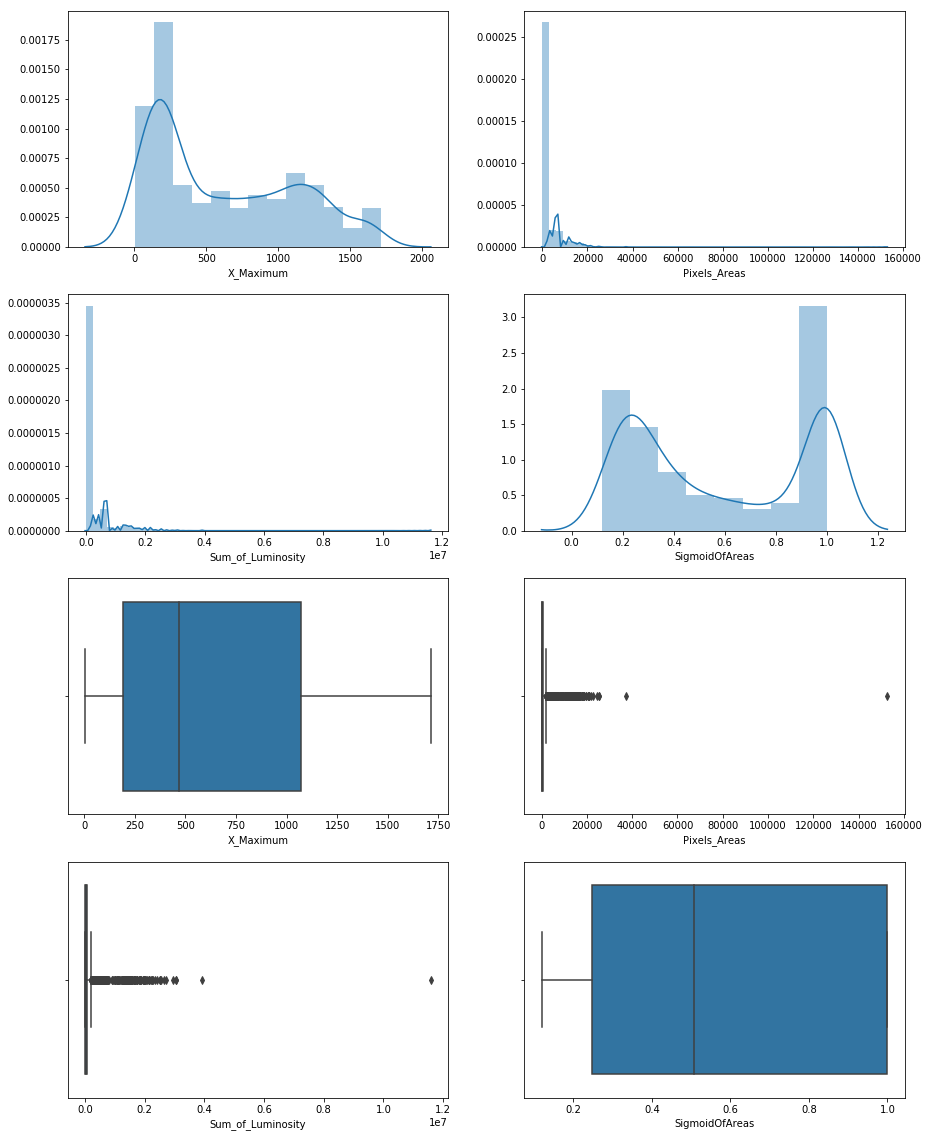

In [4]:
features = ['X_Maximum', 'Pixels_Areas', 'Sum_of_Luminosity', 'SigmoidOfAreas']
plt.figure(figsize=(15, 20))
for i, feature in enumerate(features, start=1):
    plt.subplot(4, 2, i)
    sns.distplot(df1[feature])
    plt.subplot(4, 2, i+4)
    sns.boxplot(df1[feature])
plt.show()

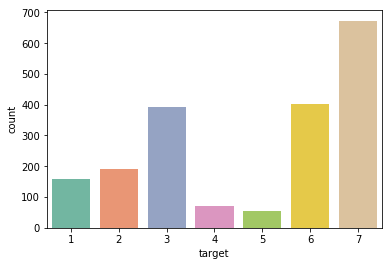

In [29]:
sns.countplot(x='target', data=df1, palette='Set2')

1-2 변수 선택(VIF), 파생변수 생성, 데이터 분할(train/test(20%))
(시각화와 통계량을 제시할 것)

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    vif_df = pd.DataFrame()
    vif_df["Feature"] = df.columns
    vif_df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_df

numeric_cols = df1.select_dtypes(include=np.number).drop('target',axis=1).columns
calc_vif(df1[numeric_cols])

,Feature,VIF
0,X_Minimum,4.207249e+04
1,X_Maximum,3.841371e+04
2,Y_Minimum,1.703244e+10
3,Y_Maximum,1.703264e+10
4,Pixels_Areas,4.907086e+02
5,X_Perimeter,1.687822e+02
6,Y_Perimeter,1.559205e+03
7,Sum_of_Luminosity,3.661924e+02
8,Minimum_of_Luminosity,8.324323e+00
9,Maximum_of_Luminosity,6.036402e+00


In [6]:
def feature_selection(df, threshhold):
    features = df.columns.tolist()
    while True:
        vif_df = calc_vif(df[features])
        max_vif = vif_df['VIF'].max()
        if max_vif > threshhold:
            maxloc = vif_df['VIF'].idxmax()
            print(f'{df[features].columns[maxloc]} vif={max_vif:.2f}으로 가장 높아 제거')
            features.pop(maxloc)
        else:
            break
    return features

selected_features = feature_selection(df1[numeric_cols], 10)
print(f'최종 변수: {selected_features}')

Y_Maximum vif=17032637295.75으로 가장 높아 제거
X_Minimum vif=41105.20으로 가장 높아 제거
LogOfAreas vif=1125.20으로 가장 높아 제거
TypeOfSteel_A400 vif=585.27으로 가장 높아 제거
Pixels_Areas vif=453.69으로 가장 높아 제거
Log_X_Index vif=413.45으로 가장 높아 제거
Maximum_of_Luminosity vif=162.17으로 가장 높아 제거
Log_Y_Index vif=136.06으로 가장 높아 제거
X_Perimeter vif=101.39으로 가장 높아 제거
Length_of_Conveyer vif=88.53으로 가장 높아 제거
Edges_Y_Index vif=58.84으로 가장 높아 제거
Minimum_of_Luminosity vif=26.11으로 가장 높아 제거
Empty_Index vif=12.14으로 가장 높아 제거
Edges_X_Index vif=11.04으로 가장 높아 제거
최종 변수: ['X_Maximum', 'Y_Minimum', 'Y_Perimeter', 'Sum_of_Luminosity', 'TypeOfSteel_A300', 'Steel_Plate_Thickness', 'Edges_Index', 'Square_Index', 'Outside_X_Index', 'Outside_Global_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']


In [33]:
from sklearn.model_selection import train_test_split

object_cols = df1.select_dtypes(include='object').columns
X = pd.concat([df1[selected_features], df1[object_cols]], axis=1)
X = pd.get_dummies(data=X, columns=object_cols, drop_first=True)
y = df1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [34]:
X_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
X_Maximum,1552.0,6.081095e+02,4.977190e+02,4.0000,191.000000,4.400000e+02,1.069500e+03,1.713000e+03
Y_Minimum,1552.0,1.633255e+06,1.721459e+06,6712.0000,471779.500000,1.198958e+06,2.182184e+06,1.291703e+07
Y_Perimeter,1552.0,8.600193e+01,4.732478e+02,1.0000,13.000000,2.500000e+01,8.700000e+01,1.815200e+04
Sum_of_Luminosity,1552.0,2.106769e+05,5.300751e+05,250.0000,9548.750000,1.943450e+04,8.920950e+04,1.159141e+07
TypeOfSteel_A300,1552.0,3.988402e-01,4.898176e-01,0.0000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00
Steel_Plate_Thickness,1552.0,7.853286e+01,5.487201e+01,40.0000,40.000000,7.000000e+01,8.000000e+01,3.000000e+02
Edges_Index,1552.0,3.271300e-01,2.998872e-01,0.0000,0.060400,2.188000e-01,5.642250e-01,9.952000e-01
Square_Index,1552.0,5.711809e-01,2.703495e-01,0.0083,0.360000,5.508500e-01,8.182000e-01,1.000000e+00
Outside_X_Index,1552.0,3.347068e-02,5.888426e-02,0.0015,0.006600,1.000000e-02,2.315000e-02,8.759000e-01
Outside_Global_Index,1552.0,5.740979e-01,4.820964e-01,0.0000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00


In [35]:
print(f'maximum VIF: {calc_vif(X_train).VIF.max():.2f}')

maximum VIF: 8.84


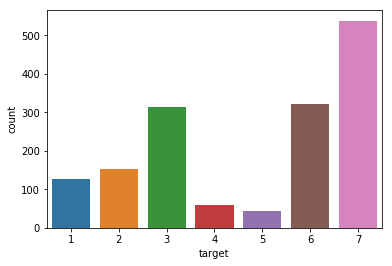

In [36]:
sns.countplot(y_train)

#### 1-3 종속변수들중 "1"인지 아닌지 판단하려한다. 종속변수를 1과 1이 아닌 값(이항)으로 치환하고 로지스틱 회귀 분석을 실시하라.
#### confusionMatrix를 확인하고 최적의 cut off value 정하여라.

In [43]:
y_train_1 = y_train.copy()
y_test_1 = y_test.copy()
y_train_1 = y_train_1.apply(lambda x: 1 if x == 1 else 0)
y_test_1 = y_test_1.apply(lambda x: 1 if x == 1 else 0)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train_1)
y_pred = lr.predict(X=X_test)
print(classification_report(y_test_1, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       357
           1       0.00      0.00      0.00        32

    accuracy                           0.92       389
   macro avg       0.46      0.50      0.48       389
weighted avg       0.84      0.92      0.88       389



c:\Coding\ADP\ADP\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix 확인
- 

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred_proba, pos_label=1)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print(f'Best Threshold={best_thresh:.6f}')
print(f'Best J={J[ix]:.6f}')

Best Threshold=0.025142
Best J=0.110732


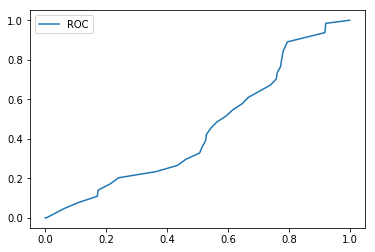

AUC: 0.450280


In [71]:
sns.lineplot(x=fpr, y=tpr, ci=None, label='ROC')
plt.show()
print(f'AUC: {roc_auc_score(y_test_1, y_pred_proba):.6f}')

In [74]:
new_pred = y_pred_proba.copy()
new_pred[new_pred >= best_thresh] = 1
new_pred[new_pred < best_thresh] = 0
print(classification_report(y_test_1, new_pred))

              precision    recall  f1-score   support

           0       0.96      0.20      0.34       357
           1       0.09      0.91      0.17        32

    accuracy                           0.26       389
   macro avg       0.53      0.56      0.25       389
weighted avg       0.89      0.26      0.32       389



```python
1-4 종속변수(y)를 다항(7 class)인 상태에서 SVM을 포함하여 3가지 알고리즘으로 평가하라.
각 모델에서 confusionMatrix를 확인하고 최적의 cut off value 를 정하여라.
```

In [111]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

svc = SVC(probability=True)
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

models = [svc, rf, gb]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model.__class__.__name__} {classification_report(y_test, y_pred)}')

c:\Coding\ADP\ADP\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC               precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        38
           3       0.89      0.74      0.81        78
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        11
           6       0.38      0.22      0.28        81
           7       0.40      0.81      0.54       135

    accuracy                           0.48       389
   macro avg       0.24      0.25      0.23       389
weighted avg       0.40      0.48      0.41       389

RandomForestClassifier               precision    recall  f1-score   support

           1       0.68      0.47      0.56        32
           2       0.93      0.71      0.81        38
           3       0.97      0.86      0.91        78
           4       1.00      0.86      0.92        14
           5       0.89      0.73      0.80        11
           6       0.63      0.65      0.64        

In [112]:
# for 3 models, find best cut-off value
rf_pred_proba = rf.predict_proba(X_test)[:, 1]
svc_pred_proba = svc.predict_proba(X_test)[:, 1]
gb_pred_proba = gb.predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_pred_proba, pos_label=1)
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc_pred_proba, pos_label=1)
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb_pred_proba, pos_label=1)

rf_J = rf_tpr - rf_fpr
svc_J = svc_tpr - svc_fpr
gb_J = gb_tpr - gb_fpr

rf_ix = np.argmax(rf_J)
svc_ix = np.argmax(svc_J)
gb_ix = np.argmax(gb_J)

rf_best_thresh = rf_thresholds[rf_ix]
svc_best_thresh = svc_thresholds[svc_ix]
gb_best_thresh = gb_thresholds[gb_ix]

print(f'RandomForest Best Threshold={rf_best_thresh:.6f}')
print(f'SVC Best Threshold={svc_best_thresh:.6f}')
print(f'GradientBoosting Best Threshold={gb_best_thresh:.6f}')

rf_new_pred = rf_pred_proba.copy()
rf_new_pred[rf_new_pred >= rf_best_thresh] = 1
rf_new_pred[rf_new_pred < rf_best_thresh] = 0
print(f'{rf.__class__.__name__}\n{classification_report(y_test, rf_new_pred)}')

RandomForest Best Threshold=0.030000
SVC Best Threshold=0.055244
GradientBoosting Best Threshold=0.001207
RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.11      0.62      0.19        32
         2.0       0.00      0.00      0.00        38
         3.0       0.00      0.00      0.00        78
         4.0       0.00      0.00      0.00        14
         5.0       0.00      0.00      0.00        11
         6.0       0.00      0.00      0.00        81
         7.0       0.00      0.00      0.00       135

    accuracy                           0.05       389
   macro avg       0.01      0.08      0.02       389
weighted avg       0.01      0.05      0.02       389



c:\Coding\ADP\ADP\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Coding\ADP\ADP\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


```python
1-5 종속변수를 제외한 나머지 데이터를 바탕으로 군집분석을 실시하고 최적의 군집수와 군집 레이블을 구하여라.
군집레이블을 추가한 데이터를 1-4 에서 만든 모델중 가장 성능이 좋았던 하나의 모델에 다시 학습하여 F1-score를 비교하라
```

In [113]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = {}
interias = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_train)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    score = silhouette_score(X_train, labels)
    silhouette_scores[n] = score
    interias.append(inertia)
    print(f'n_clusters: {n}, score: {score:.4f}')

n_clusters: 2, score: 0.6737
n_clusters: 3, score: 0.5536
n_clusters: 4, score: 0.5285
n_clusters: 5, score: 0.5730
n_clusters: 6, score: 0.5166
n_clusters: 7, score: 0.5185
n_clusters: 8, score: 0.5223
n_clusters: 9, score: 0.4994
n_clusters: 10, score: 0.5121


In [110]:
# 딕셔너리에서 value가 가장 큰 key값 구하기
#1. max함수
print(f'Best number of clusters: {max(silhouette_scores, key=silhouette_scores.get)}')
#2. 리스트 컴프리헨션
print(f'Best number of clusters: {[k for k, v in silhouette_scores.items() if v == max(silhouette_scores.values())][0]}')

Best number of clusters: 2
Best number of clusters: 2


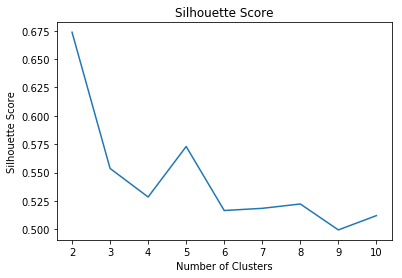

In [120]:
sns.lineplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()))
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

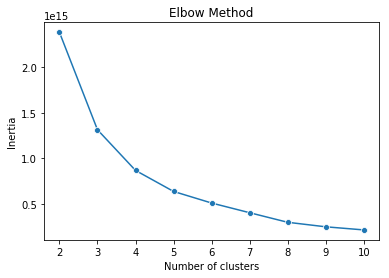

In [118]:
sns.lineplot(x=range(2, 11), y=interias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [125]:
cluster = KMeans(n_clusters=2)
X_cluster = X.copy()
X_cluster['cluster'] = cluster.fit_predict(X)
X_cluster['cluster'].value_counts()

1    1712
0     229
Name: cluster, dtype: int64

In [126]:
X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(X_cluster, y, test_size=0.2, stratify=y)

In [128]:
rf.fit(X_cluster_train, y_cluster_train)
y_cluster_pred = rf.predict(X_cluster_test)
print(rf.__class__.__name__)
print(classification_report(y_cluster_test, y_cluster_pred))

RandomForestClassifier
              precision    recall  f1-score   support

           1       0.70      0.44      0.54        32
           2       0.82      0.84      0.83        38
           3       0.97      0.99      0.98        78
           4       1.00      0.93      0.96        14
           5       1.00      0.82      0.90        11
           6       0.67      0.62      0.64        81
           7       0.69      0.79      0.73       135

    accuracy                           0.77       389
   macro avg       0.84      0.77      0.80       389
weighted avg       0.78      0.77      0.77       389

